In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WorldCups.csv')

In [3]:
data.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [4]:
data['QualifiedTeams'].max()

32

In [5]:
#check for null values
data.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [6]:
#check for number of rows and columns
data.shape

(20, 10)

In [7]:
#data statistics
data.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [41]:
#countries that hosted the most worldcup
data['Country'].value_counts()

Germany         2
Mexico          2
Brazil          2
Italy           2
France          2
Spain           1
Switzerland     1
England         1
Chile           1
South Africa    1
USA             1
Sweden          1
Uruguay         1
Argentina       1
Korea/Japan     1
Name: Country, dtype: int64

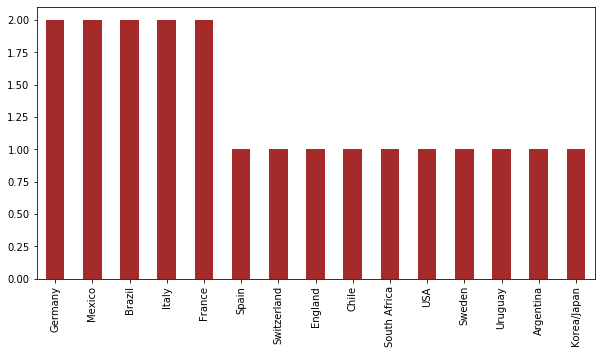

In [9]:
data.Country.value_counts().plot(kind='bar',figsize=[10,5],color='brown')

In [10]:
#world cup winners
data.Winner.value_counts()

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
Germany       1
Spain         1
England       1
France        1
Name: Winner, dtype: int64

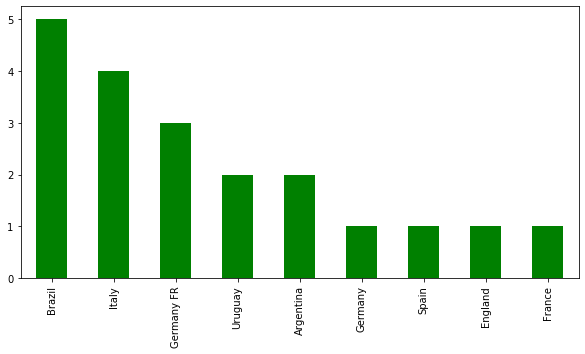

In [11]:
data.Winner.value_counts().plot(kind='bar',color='g',figsize=[10,5])

In [12]:
#total goals scored in world cup from 1930 to 2014
data.GoalsScored.sum()

2379

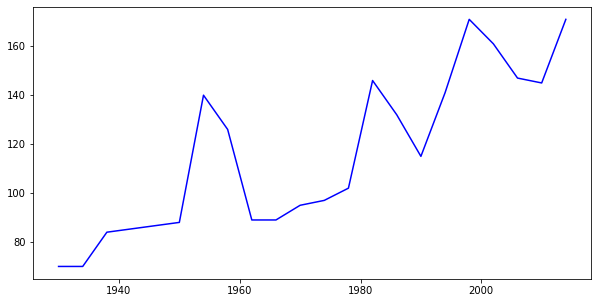

In [13]:
#plot of goals as year increase
plt.figure(figsize=(10,5))
plt.plot(data.Year,data.GoalsScored,color='b')

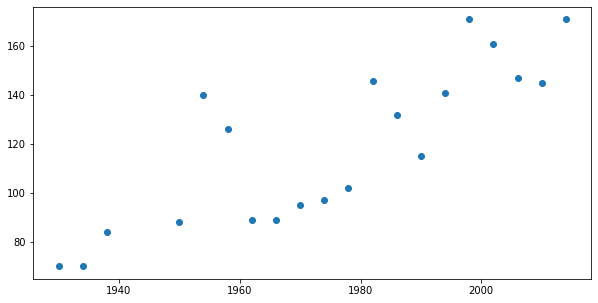

In [14]:
plt.figure(figsize=(10,5))
plt.plot(data.Year,data.GoalsScored,'o')

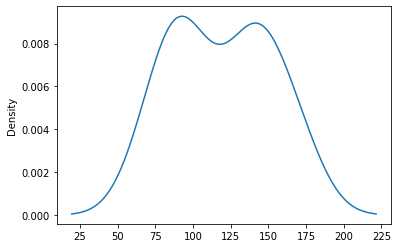

In [15]:
#distribution of goals
data.GoalsScored.plot(kind='kde')

The distribution of goals is bimodal

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

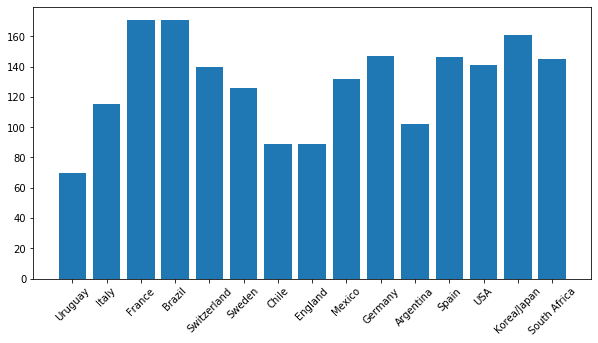

In [16]:
#goal scored in every host country
plt.figure(figsize=(10,5))
plt.bar(data['Country'],data['GoalsScored'])
plt.xticks(rotation=45)

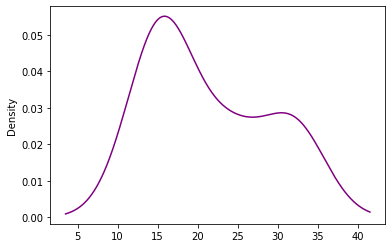

In [17]:
#distribution of qualified teams
data.QualifiedTeams.plot(kind='kde',color='purple')

(array([1920., 1940., 1960., 1980., 2000., 2020.]),
 <a list of 6 Text xticklabel objects>)

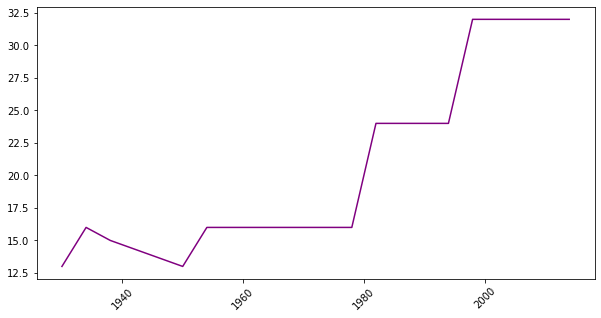

In [18]:
#how number of qualified teams vary with year
plt.figure(figsize=(10,5))
plt.plot(data['Year'],data['QualifiedTeams'],color='purple')
plt.xticks(rotation=45)

(array([1920., 1940., 1960., 1980., 2000., 2020.]),
 <a list of 6 Text xticklabel objects>)

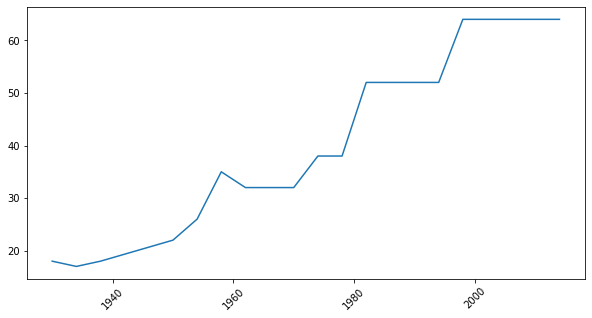

In [19]:
#Teams that participate the competition
plt.figure(figsize=(10,5))
plt.plot(data['Year'],data['MatchesPlayed'])
plt.xticks(rotation=45)

(array([1920., 1940., 1960., 1980., 2000., 2020.]),
 <a list of 6 Text xticklabel objects>)

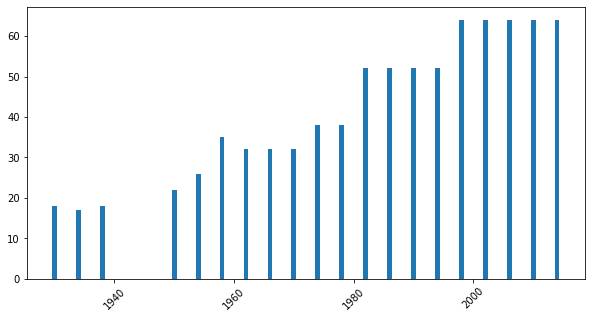

In [20]:
plt.figure(figsize=(10,5))
plt.bar(data['Year'],data['MatchesPlayed'])
plt.xticks(rotation=45)

In [21]:
#replace '.' with ''
data['Attendance'] = data['Attendance'].str.replace('.','').astype(str).astype(float).astype(int)

In [22]:
#convert Attence to integer
data['Attendance'] 



0      590549
1      363000
2      375700
3     1045246
4      768607
5      819810
6      893172
7     1563135
8     1603975
9     1865753
10    1545791
11    2109723
12    2394031
13    2516215
14    3587538
15    2785100
16    2705197
17    3359439
18    3178856
19    3386810
Name: Attendance, dtype: int32

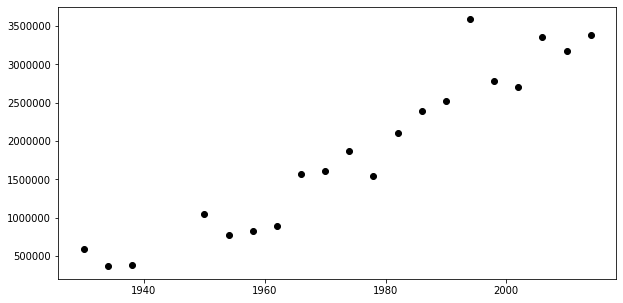

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(data.Year,data.Attendance,color='black')

<BarContainer object of 20 artists>

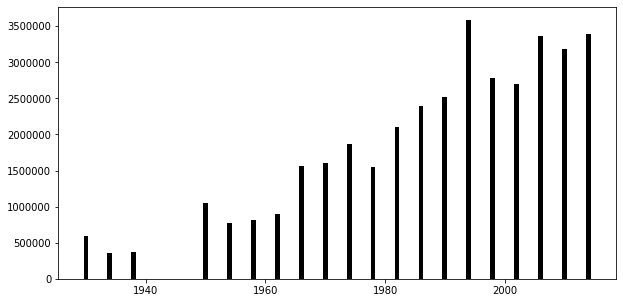

In [24]:
#plot attendance agaainst year
plt.figure(figsize=(10,5))
plt.bar(data.Year,data.Attendance,color='black')

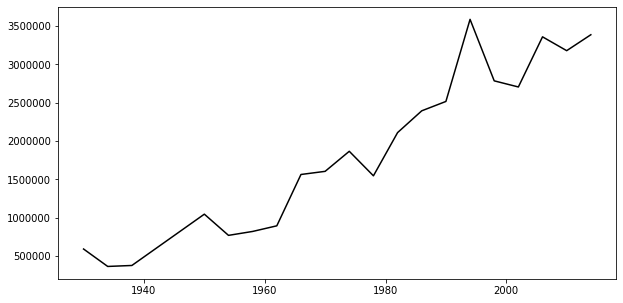

In [25]:
plt.figure(figsize=(10,5))
plt.plot(data.Year,data.Attendance,color='black')

In [26]:
 data[data['Year'] == 2014]['Winner']

19    Germany
Name: Winner, dtype: object

## Checking features correlation with target

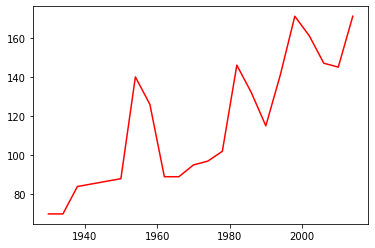

In [27]:
#checking the relationship between year and goalscored
plt.plot(data.Year,data.GoalsScored,color='r')

<BarContainer object of 20 artists>

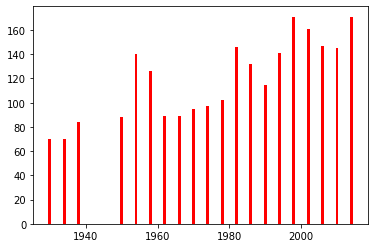

In [28]:
plt.bar(data.Year,data.GoalsScored,color='r')

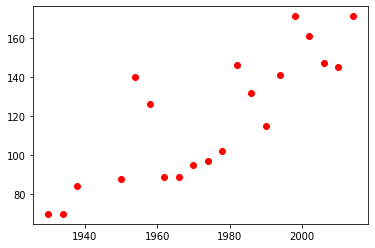

In [29]:
plt.scatter(data.Year,data.GoalsScored,color='r')

There is a positive relationship

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000.]), <a list of 9 Text xticklabel objects>)

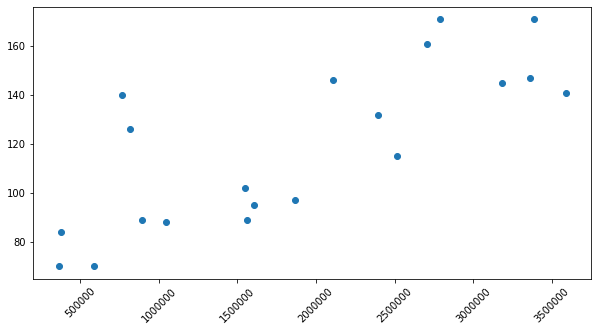

In [30]:
plt.figure(figsize=[10,5])
plt.scatter(data.Attendance,data.GoalsScored)
plt.xticks(rotation=45)

(array([10., 20., 30., 40., 50., 60., 70.]),
 <a list of 7 Text xticklabel objects>)

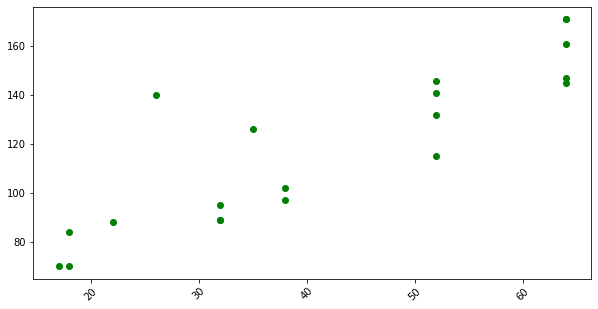

In [31]:
plt.figure(figsize=[10,5])
plt.scatter(data.MatchesPlayed,data.GoalsScored,color='green')
plt.xticks(rotation=45)

(array([10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. ]),
 <a list of 11 Text xticklabel objects>)

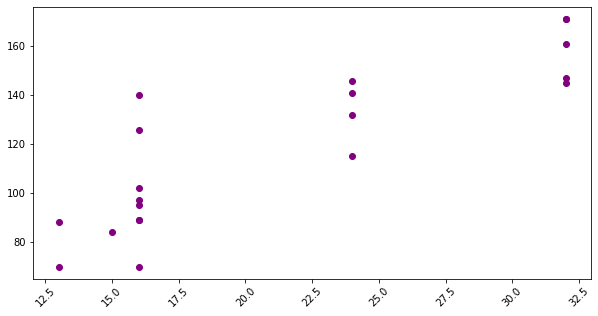

In [32]:
#plotting goals scored against teams that played in a competition
plt.figure(figsize=[10,5])
plt.scatter(data.QualifiedTeams,data.GoalsScored,color='purple')
plt.xticks(rotation=45)

In [33]:
data[data['Year']>2000]['Attendance'].mean()

3157575.5

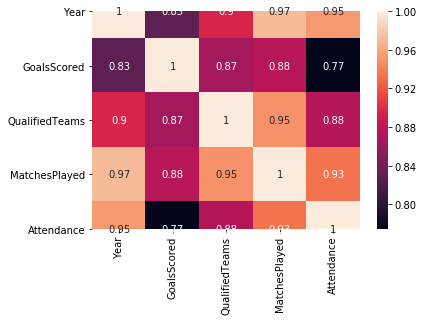

In [34]:
#checking correlation with various features
corelation = data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)
plt.show()

## Predicting Goals that will be scored in2022

## Predicting attendance in 2022

In [35]:
Data = data[['Year']]
label = data['Attendance']

In [36]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(Data,label)
predict = reg.predict(Data)

In [37]:
print(reg.score(Data,label))

0.9085105267762968


In [38]:
predict = reg.predict(np.array([2022]).reshape(-1, 1) )
print(predict)

[3757781.95921254]


## Using Year, Max qualified teams,Maximum Matches played And Predicted Attendance to compute goals that will be scored in2022

In [39]:
pre_data = {'Year':  [2022],
        'MatchesPlayed': [64],
        'QualifiedTeams':[32],
        'Attendance':[3757781.95921254]
        }
pred_data = pd.DataFrame (pre_data, columns = ['Year','MatchesPlayed','QualifiedTeams','Attendance'])
pred_data

,Year,MatchesPlayed,QualifiedTeams,Attendance
0,2022,64,32,3.757782e+06


In [40]:
Data =data[['Year','MatchesPlayed','QualifiedTeams','Attendance']]
label = data['GoalsScored']

reg=LinearRegression()
reg.fit(Data,label)
predict = reg.predict(pred_data)
print(predict)

[153.47399283]


The model predicted that about 153 goals will be scored during the 2022 world cup